### Part A

In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

#Importing all the libraries and all the fuctions required for preprcessing, investigation and predicting.

import pandas as pd
import numpy as np
import matplotlib as matplot
import matplotlib.pyplot as plot
import seaborn as sea_b
import matplotlib as mp

#Libraries for spliting the data 

from sklearn.model_selection import train_test_split

#Libraries for determining the efficiency of predictive model that being used

from sklearn.metrics import mean_squared_error

from sklearn.metrics import classification_report, confusion_matrix

#Importing classifiers that are we gonna try to use for training and predicting

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm

#Reading the csv files with the data we want to train and predict 

Train_data    = pd.read_csv('CE802_P2_Data.csv')
Test_data     = pd.read_csv('CE802_P2_Test.csv')





# Investigation

Going through the data and serching for data types provided and serching for cell with null values (missing data) for both Training and data file provided by the client(The project set in to be file given by the client).

In [2]:


print("===============Training Data===================")
print("\n")
Train_data.info()
print("\n")
print("===============================================")
print("\n")
print("================Testing Data===================")
print("\n")
Test_data.info()
print("\n")
print("===============================================")



===============Training Data===================


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   int64  
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   int64  
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    f

In [3]:
Train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1,164.190,-4178.67,4.99800,-2549.640,13.149000,-2.3611,-5.2077,5335.84,35223.120,...,-4.20700,0,0.210430,36.0960,-2114.140,-7.2180,-4488.06,-13.4058,-50.25,False
1,1,198.880,-3543.06,4.30770,-2756.201,14.838000,-4.7280,-5.0266,5798.16,35355.420,...,-3.88000,0,0.133771,20.1660,-1666.780,-4.9785,-4640.64,-14.6730,-53.40,True
2,0,181.412,-4216.57,5.05700,-2740.469,9.642900,-2.2035,-5.1951,4049.44,38741.130,...,-3.80300,0,0.891100,11.5167,-1786.518,-15.3990,-4306.77,-22.7340,NaN,False
3,0,171.074,-2659.26,4.39720,-2822.720,9.377610,-2.2478,-4.5436,4964.64,35331.990,...,-5.68300,0,0.738000,20.4390,-1730.260,-5.3937,-4475.04,-18.0990,-51.66,True
4,0,175.464,-2008.26,3.86574,-2441.840,12.103500,-4.4130,-4.5974,5958.06,34318.530,...,-4.26100,1,0.243700,3.8640,-1744.300,-5.3109,-4709.85,-20.8470,-51.63,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,203.260,-3677.96,3.90350,-3492.140,11.225400,-4.3740,-5.0356,5720.32,35330.190,...,-4.09700,1,0.241700,-0.5760,-1557.540,-12.0300,-4559.82,-14.0673,NaN,True
996,1,167.006,-4659.66,4.13870,-2918.840,13.548000,-2.6132,-4.8853,4355.84,35224.950,...,-5.62100,1,0.134478,-0.8850,-1838.920,-9.0630,-4218.72,-16.9380,-48.63,False
997,1,166.774,-4159.46,4.72140,-2547.140,10.103100,-2.8030,-5.0583,5678.86,35393.880,...,-3.24150,0,1.377000,7.4820,-1783.752,-9.6150,-4623.39,-23.5410,-52.89,False
998,0,185.220,-3261.86,3.98970,-2313.540,9.249396,-2.4813,-4.6374,4761.04,35339.310,...,-5.02900,1,0.149220,25.1010,-1876.140,-5.1960,-4281.33,-15.7461,-50.88,False


In [4]:
Test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,0,180.3900,-2683.26,4.06290,-1803.74,15.6120,-2.91120,-4.69490,5917.88,35245.830,...,-2.4056,1,0.575200,-19.6800,-1847.580,-5.50470,-5269.35,-17.46600,NaN,NaN
1,1,194.2400,-4072.86,4.33670,-3023.74,10.2369,-5.88200,-6.92700,5736.56,35230.200,...,-3.0515,1,0.972600,43.0200,-1468.340,-5.80050,-4922.25,-14.28030,NaN,NaN
2,1,169.7700,-4311.36,4.12910,-2007.24,10.3749,-2.50970,-6.06100,4726.04,35438.730,...,-2.6240,1,0.133616,2.6610,-1900.940,-4.73355,-3219.45,-17.25000,-48.54,NaN
3,0,183.2540,-4332.98,3.84855,904.26,15.9840,-2.10121,-5.61200,-2835.76,35262.396,...,-2.4225,1,1.078600,6.5400,-1894.500,-14.31600,-975.75,-17.19300,NaN,NaN
4,1,174.3080,-4279.17,6.45200,-2712.87,11.0646,-2.27950,-4.47745,6893.64,35244.660,...,-3.3620,1,1.521000,-13.1040,-1774.988,-5.68800,-4805.25,-15.23730,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,175.3020,-4367.16,7.03200,-2671.39,9.8322,-2.28140,-5.25890,6096.84,34856.730,...,-2.8364,1,0.132896,37.1580,-1834.960,-5.27520,-4757.55,-17.67300,-51.03,NaN
996,1,186.1800,-4299.01,4.89000,-2834.18,10.0860,-2.20870,-7.03200,1814.24,35385.180,...,-2.3489,1,2.279000,-4.0230,-1850.440,-9.58200,3002.25,-14.80080,-45.60,NaN
997,1,173.5080,-4195.02,4.89800,-2813.35,9.7593,-3.11400,-6.19700,5460.44,35328.450,...,-2.8860,1,0.231300,-3.0510,-1663.240,-4.72704,-4675.62,-14.69790,-52.62,NaN
998,1,172.4820,-4295.76,3.99680,-3721.34,11.0550,-3.71300,-5.23050,5125.04,35059.590,...,-2.6042,1,0.791000,12.9513,-1863.920,-5.70330,-2144.55,-13.87860,NaN,NaN


In [5]:
from collections import Counter

x  = {C_Name : Train_data[C_Name].isnull().sum() for C_Name in Train_data}
Counter(x).most_common()

[('F21', 500),
 ('F1', 0),
 ('F2', 0),
 ('F3', 0),
 ('F4', 0),
 ('F5', 0),
 ('F6', 0),
 ('F7', 0),
 ('F8', 0),
 ('F9', 0),
 ('F10', 0),
 ('F11', 0),
 ('F12', 0),
 ('F13', 0),
 ('F14', 0),
 ('F15', 0),
 ('F16', 0),
 ('F17', 0),
 ('F18', 0),
 ('F19', 0),
 ('F20', 0),
 ('Class', 0)]

In [6]:
from collections import Counter

x  = {C_Name : Test_data[C_Name].isnull().sum() for C_Name in Test_data}
Counter(x).most_common()

[('Class', 1000),
 ('F21', 500),
 ('F1', 0),
 ('F2', 0),
 ('F3', 0),
 ('F4', 0),
 ('F5', 0),
 ('F6', 0),
 ('F7', 0),
 ('F8', 0),
 ('F9', 0),
 ('F10', 0),
 ('F11', 0),
 ('F12', 0),
 ('F13', 0),
 ('F14', 0),
 ('F15', 0),
 ('F16', 0),
 ('F17', 0),
 ('F18', 0),
 ('F19', 0),
 ('F20', 0)]

In [7]:
Train_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,0.507000,183.864599,-3924.895867,4.778608,-2538.698490,11.563792,-3.004358,-5.435266,5161.847898,35436.452131,...,9025.612611,-3.297873,0.481000,0.614264,11.735125,-1931.272785,-7.410040,-4384.216246,-15.902875,-49.360560
std,0.500201,20.571395,1037.177844,0.901204,702.890861,1.842535,0.869678,0.899919,1494.941683,5064.689411,...,1058.036210,0.902763,0.499889,0.671938,14.584924,493.077434,2.560369,1534.747192,2.708330,3.188244
min,0.000000,163.564660,-8482.260000,3.842990,-6268.740000,9.241776,-6.595000,-8.862000,-4799.760000,24137.130000,...,2731.260000,-6.832000,0.000000,0.130001,-45.780000,-5111.540000,-18.069000,-14823.750000,-26.394000,-59.670000
25%,0.000000,169.944000,-4325.040000,4.101825,-2819.817500,10.103100,-3.389500,-5.918250,5000.140000,35234.025000,...,8615.560000,-3.694250,0.000000,0.173685,2.510250,-1958.215000,-8.505000,-4790.850000,-17.140500,-51.585000
50%,1.000000,177.724000,-4131.460000,4.497250,-2677.050000,11.162250,-2.749050,-5.144800,5539.140000,35290.473000,...,8786.950000,-3.013700,0.000000,0.363600,11.850150,-1823.600000,-6.596250,-4417.084500,-15.066750,-49.215000
75%,1.000000,189.465000,-3811.385000,5.147000,-2445.365000,12.703500,-2.353325,-4.733575,5792.546500,35348.460000,...,9097.260000,-2.626475,1.000000,0.769525,20.939250,-1757.457500,-5.517000,-3982.050000,-13.822350,-47.160000
max,1.000000,327.120000,3847.740000,8.395000,2276.260000,19.863000,-2.082220,-4.461380,13246.240000,193598.130000,...,20155.260000,-2.342200,1.000000,5.948000,58.860000,1350.460000,-4.713870,7388.250000,-12.936360,-39.240000


             F1        F2        F3        F4        F5        F6        F7  \
F1     1.000000  0.011814 -0.022925 -0.016538 -0.019158  0.007055  0.019879   
F2     0.011814  1.000000  0.005679 -0.042713 -0.012361 -0.000686 -0.018222   
F3    -0.022925  0.005679  1.000000 -0.055473 -0.022679 -0.003705  0.014486   
F4    -0.016538 -0.042713 -0.055473  1.000000 -0.213338  0.006901 -0.011183   
F5    -0.019158 -0.012361 -0.022679 -0.213338  1.000000 -0.044764 -0.018811   
F6     0.007055 -0.000686 -0.003705  0.006901 -0.044764  1.000000  0.064432   
F7     0.019879 -0.018222  0.014486 -0.011183 -0.018811  0.064432  1.000000   
F8    -0.012570  0.014276  0.228368  0.042789 -0.004537 -0.025508 -0.003312   
F9    -0.009826 -0.001953  0.042754  0.042462  0.123040  0.004322 -0.287894   
F10   -0.037403 -0.018965 -0.010368  0.037891 -0.012279 -0.042314 -0.092579   
F11   -0.019222 -0.014585  0.033091  0.069944 -0.002549 -0.031534  0.005132   
F12   -0.062860 -0.003868 -0.006837 -0.005760  0.000

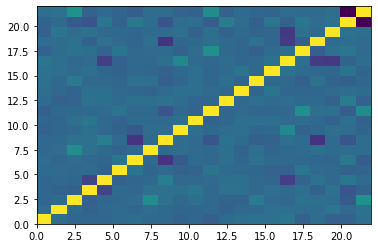

In [8]:

Core_Matrix = pd.DataFrame(Train_data.loc[:,['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11','F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21','Class']].corr())

print(Core_Matrix)

plot.pcolor(Core_Matrix)
plot.show()

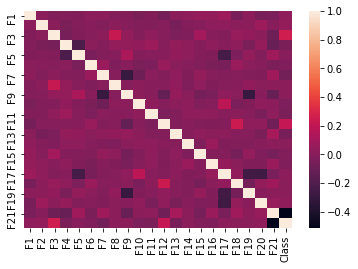

In [9]:
sea_b.heatmap(data = Core_Matrix)
plot.show()

<AxesSubplot:>

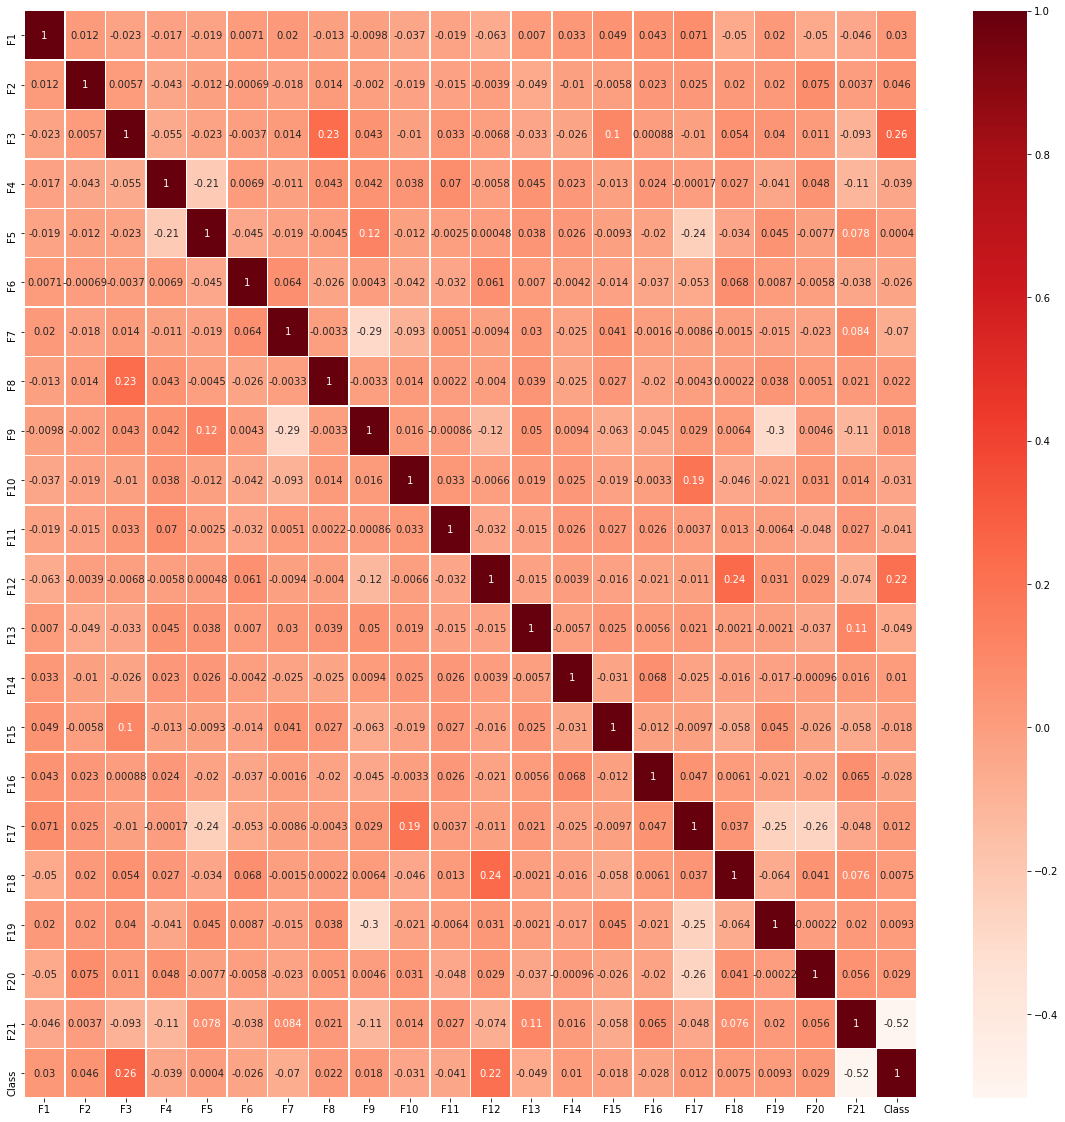

In [10]:
plot.subplots(figsize=(20,20))
sea_b.heatmap(Train_data.corr(), annot=True, linewidths= 0.5, cmap="Reds")

# Imputation & Training

Upon investigation done on the provided data it is found that the feature "F21" found to have some NaN values. Their are many methodes we can deal with this values some of the well known are:

<br>1 . No action : Keeping the data as it is and trainig will be done on it
<br>2 . Replacing null values with zero
<br>3 . Replacing the null values with most frequent values thats in that column(here it being column F21)
<br>4 . Replacing the null values with mean value of available values

We may opt for two deffirent methods for imputaion from the above metioned ones and followed by training four different ML techniques that being.

<br>1 . Random Forest Classifier
<br>2 . Decision Tree Classifier
<br>3 . KNN (K-Nearest Neighbor)
<br>4 . SVM (Support vector machines)
 
 To detemining the best classifer we will be looking at the confusion generated from the output and use that to predict the output for the test data set provided by the client.

# Imputation - Dropping F21

The first methode that will be adopted is the most commomn one. We will be dropping the columns with missing data. This will mean that the feature "F21" will not be considered at all when predicting the "Class"


In [11]:
Train_data_drop = Train_data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11','F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20']]
Train_data_out = Train_data['Class']

===============================================================================================
Splitting the data into test and train data set so that we can test the trained classifier and determine the how accurate the trained model is.
===============================================================================================

In [12]:
Train_data_drop,Train_data_drop_testin,Train_data_out,Train_data_drop_testout = train_test_split(Train_data_drop, Train_data_out, test_size=0.33)

## Random Forest Classifier


In [13]:
Random_For_Classifier = RandomForestClassifier(n_estimators = 190)

Random_For_Classifier.fit(Train_data_drop,Train_data_out)


Random_For_Classifier_Predictions = Random_For_Classifier.predict(Train_data_drop_testin)

print(confusion_matrix(Train_data_drop_testout,Random_For_Classifier_Predictions))
print('========================================================')
print(classification_report(Train_data_drop_testout,Random_For_Classifier_Predictions))

[[132  37]
 [ 24 137]]
              precision    recall  f1-score   support

       False       0.85      0.78      0.81       169
        True       0.79      0.85      0.82       161

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



## Decision Tree Classifier


In [14]:
Decision_Tree_Classifier = DecisionTreeClassifier()

Decision_Tree_Classifier.fit(Train_data_drop,Train_data_out)

Decision_Tree_Classifier_Predictions = Decision_Tree_Classifier.predict(Train_data_drop_testin)

print('========================================================')
print(classification_report(Train_data_drop_testout,Decision_Tree_Classifier_Predictions))
print('========================================================')



              precision    recall  f1-score   support

       False       0.90      0.81      0.85       169
        True       0.82      0.90      0.86       161

    accuracy                           0.85       330
   macro avg       0.86      0.86      0.85       330
weighted avg       0.86      0.85      0.85       330



## K-Nearest Neighbors


In [15]:
KNearest_Neighbors = KNeighborsClassifier(n_neighbors = 10)

KNearest_Neighbors.fit(Train_data_drop,Train_data_out)

KNearest_Neighbors_Predictions = KNearest_Neighbors.predict(Train_data_drop_testin)

print(confusion_matrix(Train_data_drop_testout,KNearest_Neighbors_Predictions))
print('========================================================')
print(classification_report(Train_data_drop_testout,KNearest_Neighbors_Predictions))

[[120  49]
 [ 67  94]]
              precision    recall  f1-score   support

       False       0.64      0.71      0.67       169
        True       0.66      0.58      0.62       161

    accuracy                           0.65       330
   macro avg       0.65      0.65      0.65       330
weighted avg       0.65      0.65      0.65       330



## SVM

In [16]:
SVM_Classifier = svm.SVC(kernel='linear')

SVM_Classifier.fit(Train_data_drop,Train_data_out)

SVM_Classifier_Predictions = SVM_Classifier.predict(Train_data_drop_testin)

print(confusion_matrix(Train_data_drop_testout,SVM_Classifier_Predictions))
print('========================================================')
print(classification_report(Train_data_drop_testout,SVM_Classifier_Predictions))

[[116  53]
 [ 51 110]]
              precision    recall  f1-score   support

       False       0.69      0.69      0.69       169
        True       0.67      0.68      0.68       161

    accuracy                           0.68       330
   macro avg       0.68      0.68      0.68       330
weighted avg       0.68      0.68      0.68       330



# Imputation - Null replaced with mean

The second methode that will be adopted is replacing the Null values with mean value of F21 feature. We will be dropping the columns with missing data.

In [17]:
#Seperating the data as input and output into two seperate variables so we can use it for training and testing

Train_data_mean = Train_data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11','F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21']]
Train_data_out = Train_data['Class']


# Finding the mean value for column F21

mean_val = Train_data_mean['F21'].mean()

#Filling the NaN values in place of mean.

Train_data_mean['F21'].fillna(value = mean_val, inplace = True)


#Splitting data to train and test sets

Train_data_mean,Train_data_mean_testin,Train_data_out,Train_data_mean_testout = train_test_split(Train_data_mean, Train_data_out, test_size=0.33)

Train_data_mean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 670 entries, 298 to 602
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      670 non-null    int64  
 1   F2      670 non-null    float64
 2   F3      670 non-null    float64
 3   F4      670 non-null    float64
 4   F5      670 non-null    float64
 5   F6      670 non-null    float64
 6   F7      670 non-null    float64
 7   F8      670 non-null    float64
 8   F9      670 non-null    float64
 9   F10     670 non-null    float64
 10  F11     670 non-null    float64
 11  F12     670 non-null    float64
 12  F13     670 non-null    float64
 13  F14     670 non-null    int64  
 14  F15     670 non-null    float64
 15  F16     670 non-null    float64
 16  F17     670 non-null    float64
 17  F18     670 non-null    float64
 18  F19     670 non-null    float64
 19  F20     670 non-null    float64
 20  F21     670 non-null    float64
dtypes: float64(19), int64(2)
memory usage

C:\Users\jjjoh\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


# Random Forest Classifier


In [18]:
Random_For_Classifier_mean = RandomForestClassifier(n_estimators = 190)

Random_For_Classifier_mean.fit(Train_data_mean,Train_data_out)

Random_For_Classifier_mean_Predictions = Random_For_Classifier_mean.predict(Train_data_mean_testin)

print(confusion_matrix(Train_data_mean_testout,Random_For_Classifier_mean_Predictions))
print('========================================================')
print(classification_report(Train_data_mean_testout,Random_For_Classifier_mean_Predictions))

[[138  24]
 [ 17 151]]
              precision    recall  f1-score   support

       False       0.89      0.85      0.87       162
        True       0.86      0.90      0.88       168

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330



# Decision Tree Classifier



In [19]:
Decision_Tree_Classifier_mean = DecisionTreeClassifier(random_state = 4)

Decision_Tree_Classifier_mean.fit(Train_data_mean,Train_data_out)

Decision_Tree_Classifier_mean_Predictions = Decision_Tree_Classifier_mean.predict(Train_data_mean_testin)

print(confusion_matrix(Train_data_mean_testout,Decision_Tree_Classifier_mean_Predictions))
print('========================================================')
print(classification_report(Train_data_mean_testout,Decision_Tree_Classifier_mean_Predictions))

[[134  28]
 [ 25 143]]
              precision    recall  f1-score   support

       False       0.84      0.83      0.83       162
        True       0.84      0.85      0.84       168

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



# K-Nearest Neighbors

In [20]:
KNearest_Neighbors_mean = KNeighborsClassifier(n_neighbors = 10)

KNearest_Neighbors_mean.fit(Train_data_mean,Train_data_out)

KNearest_Neighbors_mean_Predictions = KNearest_Neighbors_mean.predict(Train_data_mean_testin)

print(confusion_matrix(Train_data_mean_testout,KNearest_Neighbors_mean_Predictions))
print('========================================================')
print(classification_report(Train_data_mean_testout,KNearest_Neighbors_mean_Predictions))

[[125  37]
 [ 75  93]]
              precision    recall  f1-score   support

       False       0.62      0.77      0.69       162
        True       0.72      0.55      0.62       168

    accuracy                           0.66       330
   macro avg       0.67      0.66      0.66       330
weighted avg       0.67      0.66      0.66       330



# SVM

In [21]:
SVM_Classifier_mean = svm.SVC(kernel='linear')

SVM_Classifier_mean.fit(Train_data_mean,Train_data_out)

SVM_Classifier_mean_Predictions = SVM_Classifier_mean.predict(Train_data_mean_testin)

print(confusion_matrix(Train_data_mean_testout,SVM_Classifier_mean_Predictions))
print('========================================================')
print(classification_report(Train_data_mean_testout,SVM_Classifier_mean_Predictions))

[[117  45]
 [ 46 122]]
              precision    recall  f1-score   support

       False       0.72      0.72      0.72       162
        True       0.73      0.73      0.73       168

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



# Conclusion

Upon investigation we can determine that Random Forrest Classifier with mean imputation method has the best result/accuracy so we will be using that methode for predicting for the  test data provided by the client.

### Part B

In [23]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

# Finding the mean value for column F21

mean_val = test_data['F21'].mean()

# Filling the NaN values in place of mean.

test_data['F21'].fillna(value = mean_val, inplace = True)


predicted = Random_For_Classifier_mean.predict(test_data)

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])